# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
count = mouse_df[['Mouse ID']].nunique()
count

Mouse ID    249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
repeat_id = mouse_df.duplicated(subset=['Mouse ID','Timepoint'])
track = 0

for x in repeat_id:
    if x==True:
        print(mouse_df['Mouse ID'].loc[[track]])
    track = track + 1



861    g989
Name: Mouse ID, dtype: object
863    g989
Name: Mouse ID, dtype: object
865    g989
Name: Mouse ID, dtype: object
867    g989
Name: Mouse ID, dtype: object
869    g989
Name: Mouse ID, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_df.loc[mouse_df['Mouse ID'] == 'g989']
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.loc[mouse_df["Mouse ID"] != 'g989']
mouse_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
count = mouse_df[['Mouse ID']].nunique()
count

Mouse ID    248
dtype: int64

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_mean = mouse_df.groupby('Drug Regimen').mean()
mouse_mean = mouse_mean['Tumor Volume (mm3)']
mouse_median = mouse_df.groupby('Drug Regimen').median()
mouse_median = mouse_median['Tumor Volume (mm3)']
mouse_variance = mouse_df.groupby('Drug Regimen').var()
mouse_variance = mouse_variance['Tumor Volume (mm3)']
mouse_sd = mouse_df.groupby('Drug Regimen').std()
mouse_sd = mouse_sd['Tumor Volume (mm3)']
mouse_sem = mouse_df.groupby('Drug Regimen').sem()
mouse_sem = mouse_sem['Tumor Volume (mm3)']

summary_df = pd.merge(mouse_mean, mouse_median, on="Drug Regimen")
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)_x':"Average Tumor Volume (mm3)", 'Tumor Volume (mm3)_y':"Median Tumor Volume (mm3)"})
summary_df = pd.merge(summary_df, mouse_variance, on='Drug Regimen')
summary_df = pd.merge(summary_df, mouse_sd, on='Drug Regimen')
summary_df = pd.merge(summary_df, mouse_sem, on='Drug Regimen')
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)_x':"Variance of Tumor Volume (mm3)", 'Tumor Volume (mm3)_y':"Standard Deviation of Tumor Volume (mm3)", 'Tumor Volume (mm3)':"SEM of Tumor Volume (mm3)"})

summary_df

#print(mouse_mean)
#print(mouse_median)
#print(mouse_variance)
#print(mouse_sd)
#print(mouse_sem)

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

stat_table_df = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
stat_table_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Captured Datapoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Captured Datapoints'>

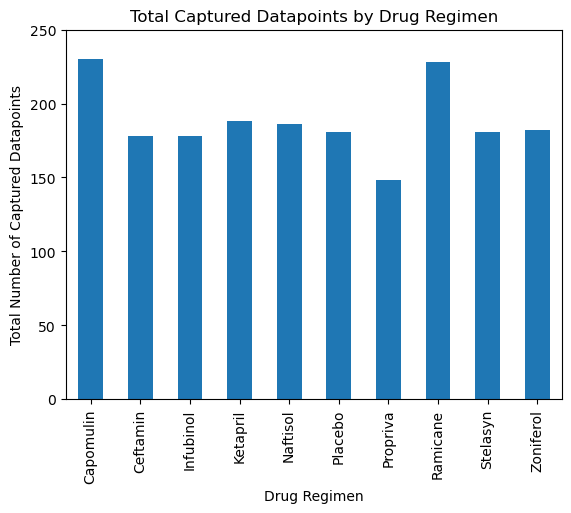

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_time_count = mouse_df.groupby('Drug Regimen')['Timepoint'].count()

time_bar = drug_time_count.plot(kind = 'bar', title = 'Total Captured Datapoints by Drug Regimen', ylim=(0,250))
time_bar.set_ylabel("Total Number of Captured Datapoints")
time_bar

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



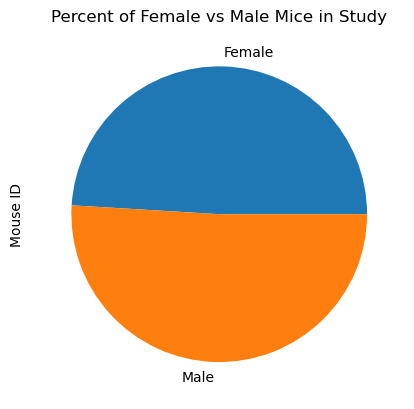

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_ms_perc = mouse_df.groupby('Sex')['Mouse ID'].count()
ms_pie = drug_ms_perc.plot(kind = 'pie', title = 'Percent of Female vs Male Mice in Study')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

sort_mouse_df = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') | (mouse_df['Drug Regimen'] == 'Ramicane') | (mouse_df['Drug Regimen'] == 'Infubinol') | (mouse_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse

sort_mouse_df['Last Entry Check'] = sort_mouse_df.duplicated(subset='Mouse ID',keep='last')
sort_mouse_df = sort_mouse_df.loc[sort_mouse_df['Last Entry Check'] == False]
#sort_mouse_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

sort_mouse_df = sort_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list).reset_index()
sort_mouse_df

C:\Users\Chokfi\AppData\Local\Temp\ipykernel_21940\3947396094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sort_mouse_df['Last Entry Check'] = sort_mouse_df.duplicated(subset='Mouse ID',keep='last')


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,"[38.98287774, 38.75326548, 32.37735684, 23.343..."
1,Ceftamin,"[61.38666032, 46.78453491, 64.29983003, 48.722..."
2,Infubinol,"[36.3213458, 72.2267309, 46.25011212, 57.03186..."
3,Ramicane,"[38.34200823, 36.56165229, 31.56046955, 38.407..."


In [103]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ["Capomulin","Ceftamin","Infubinol","Ramicane"]
sort_mouse = dict(sort_mouse_df.values)
#sort_mouse

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []
data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for q in sort_mouse:
    print(f"Information for {q}: ")
    print("")
    tumor_data = np.array(sort_mouse[q])
    tumor_data.sort()
    data_list.append(tumor_data)
    print(f"This Drug Regimen contains the following values: {tumor_data}")
    print("")
    quartiles = np.quantile(tumor_data, [.25,.5,.75])
    lowerq = quartiles[0]
    upperq = quartiles[2]
    iqr = upperq - lowerq
    print(f"The lower quartile of {q} Regimen is: {lowerq}")
    print("")
    print(f"The upper quartile of {q} Regimen is: {upperq}")
    print("")
    print(f"The inter-quartile range of {q} Regimen is: {iqr}")
    print("")
    print(f"The median of {q} Regimen is: {np.median(tumor_data)}")
    print("")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print("")
    print(f"Values above {upper_bound} could be outliers.")
    print("")
    possible_outliers = []
    for v in tumor_data:
        if (v < lower_bound) | (v > upper_bound):
            possible_outliers.append(v)
    print(f"Possible outliers may include the following: {possible_outliers}")
    print("")
    print("-------------------------------------------------------------------------------")
    print("")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Information for Capomulin: 

This Drug Regimen contains the following values: [23.34359787 28.43096411 28.48403281 30.48598484 31.02392294 31.8962384
 32.37735684 33.32909778 34.45529799 36.04104736 37.07402422 37.31184577
 38.1251644  38.75326548 38.84687569 38.93963263 38.98287774 39.95234669
 40.1592203  40.65812366 40.72857787 41.48300765 41.58152074 46.53920617
 47.68596303]

The lower quartile of Capomulin Regimen is: 32.37735684

The upper quartile of Capomulin Regimen is: 40.1592203

The inter-quartile range of Capomulin Regimen is: 7.781863460000004

The median of Capomulin Regimen is: 38.1251644

Values below 20.70456164999999 could be outliers.

Values above 51.83201549 could be outliers.

Possible outliers may include the following: []

-------------------------------------------------------------------------------

Information for Ceftamin: 

This Drug Regimen contains the following values: [45.         45.         45.         45.         46.78453491 47.7846818
 48.7220778

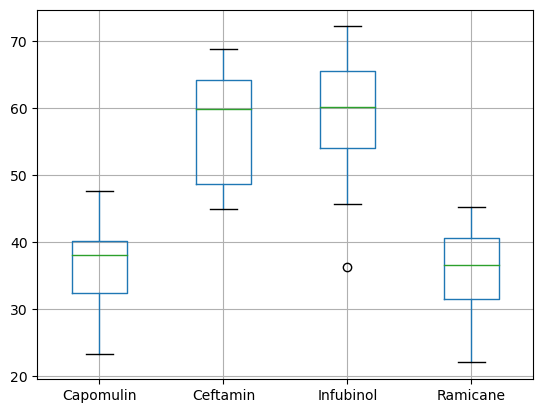

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
chart_sort_mouse = {drug_regimen[i]:data_list[i] for i in range(len(drug_regimen))}
chart_sort_mouse_df = pd.DataFrame(chart_sort_mouse)
boxplots = chart_sort_mouse_df.boxplot(column=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

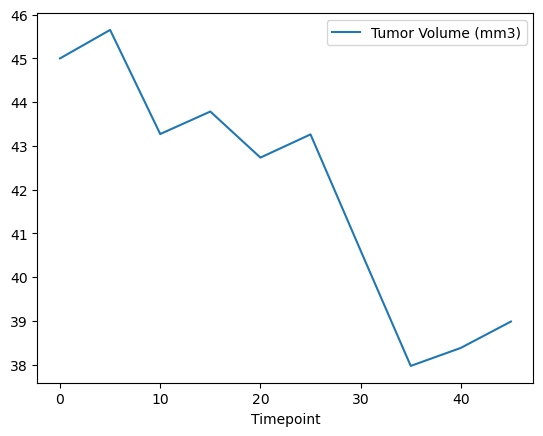

In [112]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_d1_df = mouse_df.loc[mouse_df["Drug Regimen"] == 'Capomulin']
mouse_filter = mouse_d1_df.at[0,"Mouse ID"]
mouse_line_df = mouse_d1_df.loc[mouse_d1_df["Mouse ID"] == mouse_filter]
mouse_line_df = mouse_line_df[["Timepoint","Tumor Volume (mm3)"]]
mouse_line_df
mouse_line_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

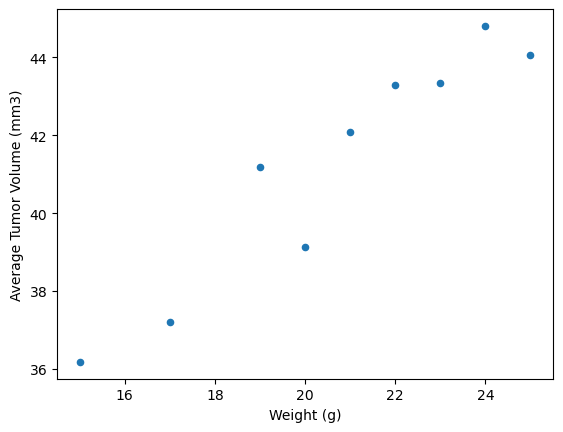

In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_scatter_df = mouse_d1_df.groupby('Weight (g)').mean().reset_index()
mouse_scatter_df = mouse_scatter_df[['Weight (g)','Tumor Volume (mm3)']]
mouse_scatter_df = mouse_scatter_df.rename(columns={'Weight (g)':"Weight (g)", 'Tumor Volume (mm3)':"Average Tumor Volume (mm3)"})
mouse_scatter_plt = mouse_scatter_df.plot.scatter(x='Weight (g)',y='Average Tumor Volume (mm3)')
mouse_scatter_plt

## Correlation and Regression

In [137]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_s_corr = mouse_scatter_df.corr(method='pearson')
print(mouse_s_corr)

x_values = mouse_scatter_df['Weight (g)']
y_values = mouse_scatter_df['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print("")
print("--------------------------------------------------")
print("")
print(f"The linear regression equation for this plot is: {line_eq}")

                            Weight (g)  Average Tumor Volume (mm3)
Weight (g)                    1.000000                    0.950524
Average Tumor Volume (mm3)    0.950524                    1.000000

--------------------------------------------------

The linear regression equation for this plot is: y = 0.89x + 22.76


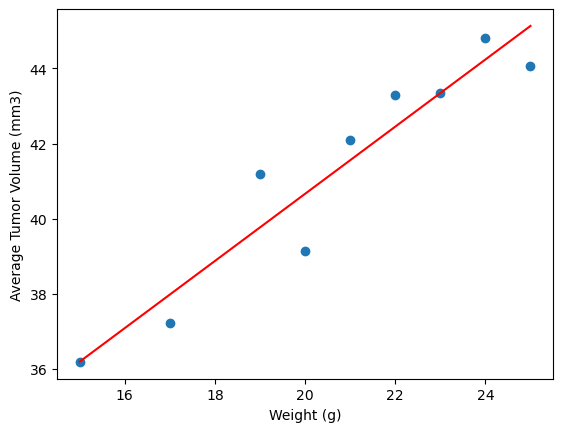

In [133]:
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x_values,regress_values,"r-")